In [1]:
#import necessary libraries

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
#import Dataset

In [53]:
df=pd.read_csv('Data.csv')

# Data Overview

In [54]:
df.head()

,Hours,Practice,TeamWork,Scores
0,2.5,0.5,0.0,21
1,5.1,1.5,0.5,47
2,3.2,1.0,0.5,27
3,8.5,3.7,1.2,75
4,3.5,1.2,0.3,30


In [55]:
df.shape

(25, 4)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hours     25 non-null     float64
 1   Practice  25 non-null     float64
 2   TeamWork  25 non-null     float64
 3   Scores    25 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 928.0 bytes


# EDA 

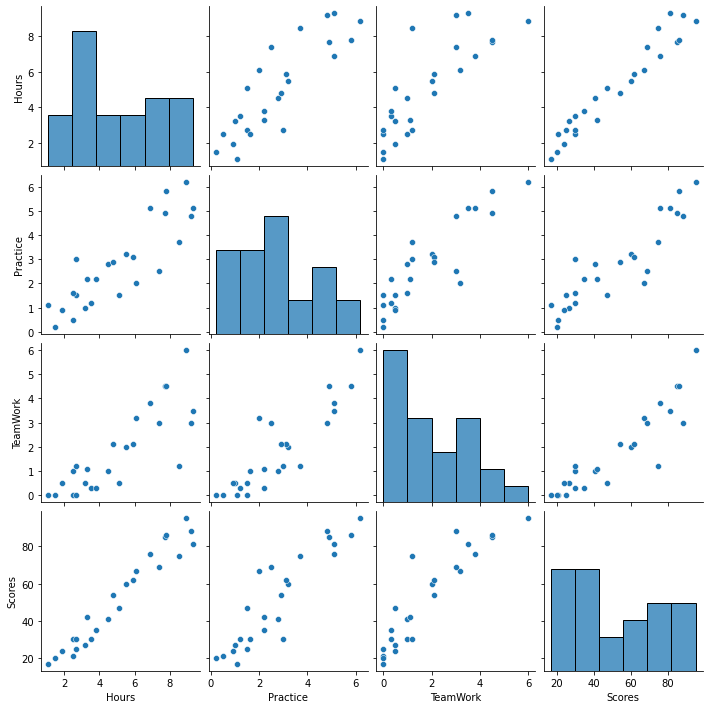

In [57]:
sns.pairplot(df)

# Features/Label

In [58]:
X=df.drop('Scores',axis=1)
y=df[['Scores']]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Train The Model

In [60]:
linearModel = LinearRegression()

In [61]:
linearModel.fit(X_train,y_train)

LinearRegression()

In [62]:
linearModel.coef_

array([[ 6.42955212, -0.3278281 ,  5.69003344]])

In [63]:
linearModel.intercept_

array([9.39494253])

In [64]:
coeffcients=pd.DataFrame([X_train.columns,linearModel.coef_[0]]).T
coeffcients=coeffcients.rename(columns={0:'Attribute',1:'Coeffcients'})
coeffcients

,Attribute,Coeffcients
0,Hours,6.429552
1,Practice,-0.327828
2,TeamWork,5.690033


# Predicting Test Data

In [82]:
y_pred=linearModel.predict(X_test)

In [86]:
compareData=pd.DataFrame(y_test.index.values,columns=['y_test'])
compareData.insert(1,'y_pred',y_pred)
compareData

,y_test,y_pred
0,16,30.634331
1,10,82.901287
2,22,34.813029
3,19,73.224158
4,7,55.088496
5,21,51.255161
6,2,32.486698
7,3,69.661212


# Evaluationg Model Performance

In [87]:
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)

In [88]:
MAE

3.203250340518327

In [89]:
MSE

14.118621058622931

In [90]:
RMSE

3.757475357021378

In [91]:
df['Scores'].mean()

51.48

# Residuals

In [94]:
test_residuals=y_test-y_pred

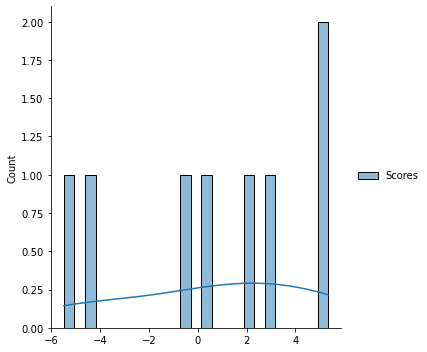

In [95]:
sns.displot(test_residuals,bins=25,kde=True)

In [99]:
#This model is not suitable for this dataset